# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

### What is the distribution of the outcome? 

In [1]:
# Your response here
import zipfile

with zipfile.ZipFile("D:\IronHack\Study\Bootcamp\labs\week 19\lab-imbalance\Fraud.csv.zip","r") as z:
    z.extractall(".")

import pandas as pd

fraud = pd.read_csv("Fraud.csv",nrows=100000)
display(fraud.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [2]:
# Your code here
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [3]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [4]:
fraud['isFraud'].value_counts()

isFraud
0    99884
1      116
Name: count, dtype: int64

In [5]:
#Target is very imbalanced

In [6]:
dummies = pd.get_dummies(fraud['type'])

In [7]:
dummies.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [8]:
fraud_with_dummies = pd.concat([fraud, dummies], axis=1)

display(fraud_with_dummies)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,159929.0,155908.34,M1257036576,0.00,0.00,0,0,False,False,False,True,False
99996,10,PAYMENT,18345.49,C744303677,6206.0,0.00,M1785344556,0.00,0.00,0,0,False,False,False,True,False
99997,10,CASH_IN,183774.91,C104331851,39173.0,222947.91,C36392889,54925.05,0.00,0,0,True,False,False,False,False
99998,10,CASH_OUT,82237.17,C707662966,6031.0,0.00,C1553004158,592635.66,799140.46,0,0,False,True,False,False,False


In [9]:
fraud_with_dummies['nameOrig'].value_counts()

nameOrig
C1231006815    1
C1407775146    1
C1802124274    1
C1910868687    1
C579725406     1
              ..
C668560116     1
C986934168     1
C1567015632    1
C1280981431    1
C1868032458    1
Name: count, Length: 100000, dtype: int64

In [10]:
fraud_with_dummies['nameDest'].value_counts()

nameDest
C985934102     78
C1286084959    72
C248609774     71
C1590550415    69
C2083562754    66
               ..
M259075709      1
M375566378      1
M1225444842     1
M1709995863     1
M1419201886     1
Name: count, Length: 51551, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fraud_with_dummies['nameOrig']=le.fit_transform(fraud_with_dummies['nameOrig'])
fraud_with_dummies['nameDest']=le.fit_transform(fraud_with_dummies['nameDest'])

display(fraud_with_dummies)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,11862,170136.0,160296.36,31981,0.00,0.00,0,0,False,False,False,True,False
1,1,PAYMENT,1864.28,34345,21249.0,19384.72,33288,0.00,0.00,0,0,False,False,False,True,False
2,1,TRANSFER,181.00,15636,181.0,0.00,9303,0.00,0.00,1,0,False,False,False,False,True
3,1,CASH_OUT,181.00,91777,181.0,0.00,8273,21182.00,0.00,1,0,False,True,False,False,False
4,1,PAYMENT,11668.14,54041,41554.0,29885.86,16681,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,21051,159929.0,155908.34,17200,0.00,0.00,0,0,False,False,False,True,False
99996,10,PAYMENT,18345.49,86688,6206.0,0.00,28011,0.00,0.00,0,0,False,False,False,True,False
99997,10,CASH_IN,183774.91,2198,39173.0,222947.91,8118,54925.05,0.00,0,0,True,False,False,False,False
99998,10,CASH_OUT,82237.17,84758,6031.0,0.00,3451,592635.66,799140.46,0,0,False,True,False,False,False


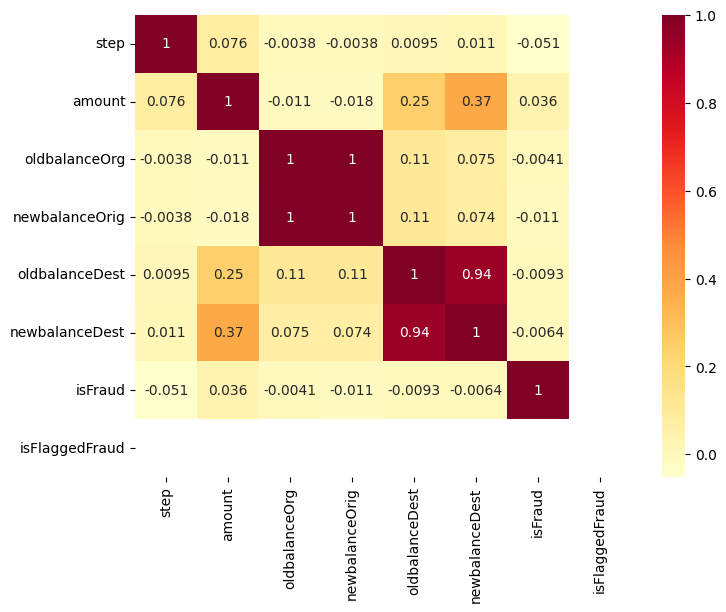

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = fraud_with_dummies.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.show()

In [13]:
fraud_with_dummies.drop(['oldbalanceOrg','oldbalanceDest','type','isFlaggedFraud'] ,axis =1, inplace = True)

In [14]:
display(fraud_with_dummies)

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,11862,160296.36,31981,0.00,0,False,False,False,True,False
1,1,1864.28,34345,19384.72,33288,0.00,0,False,False,False,True,False
2,1,181.00,15636,0.00,9303,0.00,1,False,False,False,False,True
3,1,181.00,91777,0.00,8273,0.00,1,False,True,False,False,False
4,1,11668.14,54041,29885.86,16681,0.00,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,4020.66,21051,155908.34,17200,0.00,0,False,False,False,True,False
99996,10,18345.49,86688,0.00,28011,0.00,0,False,False,False,True,False
99997,10,183774.91,2198,222947.91,8118,0.00,0,True,False,False,False,False
99998,10,82237.17,84758,0.00,3451,799140.46,0,False,True,False,False,False


In [15]:
X = fraud_with_dummies.drop('isFraud', axis=1) 
y = fraud_with_dummies['isFraud']

### Run a logisitc regression classifier and evaluate its accuracy.

In [16]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [19]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.9989

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[19978,     0],
       [   22,     0]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

The model has a perfect accuracy of 1.00, but this is misleading because the dataset is highly imbalanced. The model is simply predicting the majority class (class 0) almost all the time.
Failure to Identify Fraud (class 1): The model fails to correctly identify any instance of class 1 (fraud). This is evident from the 0 precision, recall, and F1-score for class 1.
Imbalance Issue: This suggests that the model is heavily biased towards the majority class (class 0) and is not effective at detecting fraud (class 1). In real-world applications like fraud detection, such a model would be inadequate because it would miss all fraudulent cases.

### Now pick a model of your choice and evaluate its accuracy.

In [22]:
# Your code here
#Let's try to do oversampling :

fraud = fraud_with_dummies[fraud_with_dummies['isFraud'] ==1]
no_fraud = fraud_with_dummies[fraud_with_dummies['isFraud'] == 0]

In [23]:
display(fraud.shape)
display(no_fraud.shape)

(116, 12)

(99884, 12)

In [24]:
from sklearn.utils import resample

In [25]:
# oversample minority
yes_fraud_oversampled = resample(fraud, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_fraud),#<- make both sets the same size
                                    random_state=0)

In [26]:
train_oversampled = pd.concat([no_fraud,yes_fraud_oversampled])
train_oversampled.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,11862,160296.36,31981,0.0,0,False,False,False,True,False
1,1,1864.28,34345,19384.72,33288,0.0,0,False,False,False,True,False
4,1,11668.14,54041,29885.86,16681,0.0,0,False,False,False,True,False
5,1,7817.71,94819,46042.29,42727,0.0,0,False,False,False,True,False
6,1,7107.77,28265,176087.23,39343,0.0,0,False,False,False,True,False


In [27]:
train_oversampled.shape

(199768, 12)

In [28]:
y_train_over = train_oversampled['isFraud'].copy()
X_train_over = train_oversampled.drop('isFraud',axis = 1).copy()

In [29]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

In [30]:
confusion_matrix(y_test,pred)

array([[16992,  2986],
       [    1,    21]], dtype=int64)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     19978
           1       0.01      0.95      0.01        22

    accuracy                           0.85     20000
   macro avg       0.50      0.90      0.47     20000
weighted avg       1.00      0.85      0.92     20000



Lower Accuracy: The accuracy is 0.85, which is lower than the first model. However, this model is significantly better at identifying fraud (class 1).
Recall (0.96 for class 1): This model successfully identifies 96% of actual fraud cases. The model's recall for class 1 (fraud) is significantly higher, meaning it is much better at catching fraudulent transactions.
Precision (0.01 for class 1): The precision for class 1 is low (0.01), indicating that when the model predicts a transaction as fraudulent, it is often incorrect. However, in fraud detection, a higher recall is generally more important because missing fraudulent transactions (low recall) can be very costly.
F1-Score (0.01 for class 1): The F1-score for class 1 is low, reflecting the trade-off between precision and recall. However, the high recall suggests that this model is much more useful in scenarios where identifying fraud is critical.

In [32]:
#Undersampling:
# undersample majority
no_fraud_undersampled = resample(no_fraud, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(fraud),
                                    random_state=0)


In [33]:
display(fraud.shape)
display(no_fraud_undersampled.shape)

(116, 12)

(116, 12)

In [34]:
train_undersampled = pd.concat([fraud,no_fraud_undersampled])
train_undersampled.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2,1,181.0,15636,0.0,9303,0.0,1,False,False,False,False,True
3,1,181.0,91777,0.0,8273,0.0,1,False,True,False,False,False
251,1,2806.0,21581,0.0,11864,0.0,1,False,False,False,False,True
252,1,2806.0,56833,0.0,53,0.0,1,False,True,False,False,False
680,1,20128.0,19251,0.0,5325,0.0,1,False,False,False,False,True


In [35]:
y_train_under = train_undersampled['isFraud'].copy()
X_train_under = train_undersampled.drop('isFraud',axis = 1).copy()

In [36]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test)


In [37]:
confusion_matrix(y_test,pred)

array([[16854,  3124],
       [    1,    21]], dtype=int64)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92     19978
           1       0.01      0.95      0.01        22

    accuracy                           0.84     20000
   macro avg       0.50      0.90      0.46     20000
weighted avg       1.00      0.84      0.91     20000



In [39]:
#Using SMOTE
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state = 42,sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [41]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

In [42]:
confusion_matrix(y_test,pred)

array([[18559,  1419],
       [    1,    21]], dtype=int64)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     19978
           1       0.01      0.95      0.03        22

    accuracy                           0.93     20000
   macro avg       0.51      0.94      0.50     20000
weighted avg       1.00      0.93      0.96     20000



SMOTE with another models:

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_SMOTE, y_train_SMOTE)


y_pred = classifier.predict(X_test)

print("Random Forest Classifier with SMOTE")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Classifier with SMOTE
[[19939    39]
 [   13     9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.19      0.41      0.26        22

    accuracy                           1.00     20000
   macro avg       0.59      0.70      0.63     20000
weighted avg       1.00      1.00      1.00     20000



In [46]:
from xgboost import XGBClassifier

In [47]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

# Step 3: Predict on the test data
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate the model
print("XGBoost Classifier with SMOTE")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:06:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier with SMOTE
[[19861   117]
 [   12    10]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19978
           1       0.08      0.45      0.13        22

    accuracy                           0.99     20000
   macro avg       0.54      0.72      0.57     20000
weighted avg       1.00      0.99      1.00     20000



We can try to use grid search and improve accuracy:

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=3, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train_SMOTE, y_train_SMOTE)

best_model = grid_search.best_estimator_

# # Predict and evaluate with the best model
# y_pred = best_model.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:17:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [50]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.8}

In [51]:
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42, colsample_bytree = 1.0,
 learning_rate=0.2,
 max_depth= 7,
 n_estimators= 500,
 subsample=0.8)

xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

# Step 3: Predict on the test data
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate the model
print("XGBoost Classifier with SMOTE")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\Yuliya Lavrenyuk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier with SMOTE
[[19908    70]
 [   13     9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.11      0.41      0.18        22

    accuracy                           1.00     20000
   macro avg       0.56      0.70      0.59     20000
weighted avg       1.00      1.00      1.00     20000



### Which model worked better and how do you know?

In [52]:
# Your response here
In my results, it seems that the XGBoost model and RF, despite being a more sophisticated and powerful models, are performing worse than a linear classifier.
This may happen for several reasons:

Overfitting: XGBoost is a highly flexible model with many hyperparameters. Without careful tuning, it can easily overfit to the training data, especially when using techniques like SMOTE, which can sometimes introduce noise by generating synthetic data points.

Model Complexity: XGBoost is more complex than linear classifiers, which means it might require more careful tuning of hyperparameters, particularly with imbalanced data. If the model isn't well-tuned, it can perform worse than simpler models.

Data Quality: The quality and characteristics of the data after applying SMOTE can sometimes degrade the performance of more complex models. SMOTE generates synthetic samples, which might not always perfectly represent real data, especially in high-dimensional spaces.

Class Imbalance: Even with SMOTE, if the classes are still imbalanced, it could cause issues. Additionally, SMOTE sometimes introduces synthetic points that might not align well with the decision boundaries needed by more complex models like XGBoost.


SyntaxError: unterminated string literal (detected at line 7) (2272469407.py, line 7)

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.